In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


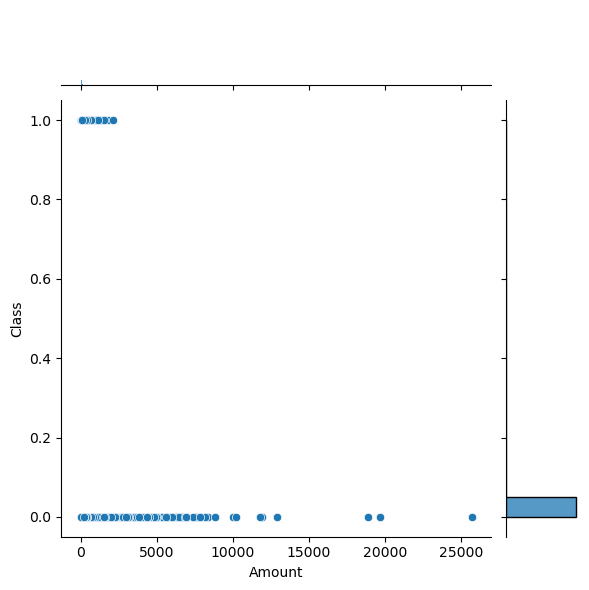

In [4]:
sns.jointplot(x='Amount',y='Class',data=df)

In [5]:
rbs = RobustScaler()

df_small = df[['Time','Amount']]
df_small = pd.DataFrame(rbs.fit_transform(df_small))

df_small.columns = ['scaled_time','scaled_amount']
df = pd.concat([df,df_small],axis=1)

df.drop(['Time','Amount'],axis=1,inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [19]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

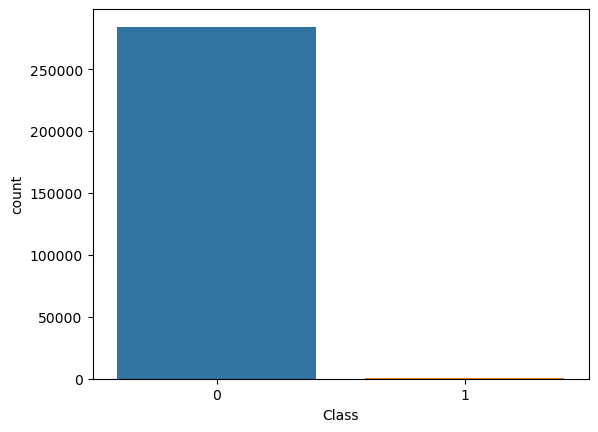

In [20]:
sns.countplot(x ='Class', data = df)

In [21]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

non_fraud = non_fraud.sample(frac=1)

non_fraud = non_fraud[:492]

new_df = pd.concat([non_fraud,fraud])
new_df = new_df.sample(frac=1)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V22,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
25937,1.333794,-1.780562,1.256292,-1.120323,-1.817819,1.542129,-2.112366,0.558577,-0.425299,1.130662,...,-0.327620,0.021394,-0.809703,0.389272,-0.017212,0.118218,0.012988,0,-0.597493,0.167680
93486,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,-0.157696,...,-0.252115,-0.158601,-0.060327,0.358339,0.076984,0.018936,0.060574,1,-0.237890,-0.307413
122667,-4.528662,-5.394329,1.629568,-0.360067,5.397757,-4.551850,-3.082619,0.222689,-1.476262,0.364055,...,1.133805,-2.209861,-0.154401,0.358293,0.568659,-0.261173,0.161754,0,-0.094526,-0.070146
6971,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,-1.987773,...,-3.042626,0.204817,0.170279,-0.393844,0.296367,1.985913,-0.900452,1,-0.888497,24.979809
10497,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,...,-0.143435,-1.047398,-0.340688,0.541235,-0.098300,-0.003041,0.049819,1,-0.792678,-0.254454


In [22]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [23]:
x = new_df.drop('Class',axis=1)
y = new_df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=20)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(787, 25) (197, 25) (787,) (197,)


In [24]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.9580686149936467

In [25]:
reg.coef_

array([[ 0.25134479,  0.55518657,  0.23281364,  0.75465797,  0.78938494,
        -0.42916092, -0.54170268, -0.25724719, -0.10704696, -0.08808883,
         0.30901659, -0.91891449, -0.17339559, -1.24610905, -0.34774214,
        -0.44490309, -0.33627976,  0.78713484, -0.12370146,  0.12482544,
        -0.2491956 , -0.08247404,  0.25051627, -0.23463464,  0.5419202 ]])

In [26]:
reg.intercept_

array([-3.84602344])

In [27]:
feature_name = x.columns.values

In [28]:
summary_table = pd.DataFrame(columns=['Feature name'],data=feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Feature name,Coefficient
0,V1,0.251345
1,V2,0.555187
2,V3,0.232814
3,V4,0.754658
4,V5,0.789385
5,V6,-0.429161
6,V7,-0.541703
7,V8,-0.257247
8,V9,-0.107047
9,V10,-0.088089


In [29]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio')

,Feature name,Coefficient,Odds_ratio
13,V14,-1.246109,0.287622
11,V12,-0.918914,0.398952
6,V7,-0.541703,0.581757
15,V17,-0.444903,0.640886
5,V6,-0.429161,0.651055
14,V16,-0.347742,0.706281
16,V20,-0.336280,0.714423
7,V8,-0.257247,0.773177
20,V26,-0.249196,0.779428
23,scaled_time,-0.234635,0.790860


In [30]:
reg.score(x_test,y_test)

0.9238578680203046